# Sarter Notebook

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


## Reading Data

In [ ]:
# read train data
df = pd.read_csv("data_with_all_columns.csv", sep=",")


# read test data
df_test = pd.read_csv("data_test_with_all_columns.csv", sep=",")

In [ ]:
len(df)

114276

In [ ]:
df.head()
df_test.head()

,Unnamed: 0,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,weight,material_handling,weight_class,city_from_name,city_to_name,city_from_coord,city_to_coord,distance,cost_per_unit,co2_per_unit
0,0,21f46131b97a,Athens,v_002,CRF,Bratislava,Amsterdam,1657474,526,598.0,5.0,0.0,Bratislava,Amsterdam,"(48.1516988, 17.1093063)","(52.3727598, 4.8936041)",987.7402,382.77,666.72
1,1,7c2bc95d92cf,Rotterdam,v_002,CRF,Bratislava,Amsterdam,1657474,475,598.0,5.0,0.0,Bratislava,Amsterdam,"(48.1516988, 17.1093063)","(52.3727598, 4.8936041)",987.7402,382.77,666.72
2,2,af989251c6df,Athens,v_002,DTD,Bratislava,Amsterdam,1660885,488,463.0,2.0,0.0,Bratislava,Amsterdam,"(48.1516988, 17.1093063)","(52.3727598, 4.8936041)",987.7402,382.77,666.72
3,3,cbb02981443c,Rotterdam,v_003,CRF,Bratislava,Amsterdam,1668127,433,594.0,5.0,0.0,Bratislava,Amsterdam,"(48.1516988, 17.1093063)","(52.3727598, 4.8936041)",987.7402,382.77,666.72
4,4,d831e0817ae2,Barcelona,v_003,DTD,Bratislava,Amsterdam,1678652,447,504.0,3.0,0.0,Bratislava,Amsterdam,"(48.1516988, 17.1093063)","(52.3727598, 4.8936041)",987.7402,382.77,666.72


# Data preprocessing

In [ ]:
#counting NA
for col in df.columns:
    if df[col].isna().sum()>0:
        print(col, df[col].isna().sum())

logistic_hub 1049
weight 118
material_handling 118
weight_class 118
city_from_name 2649
city_to_name 2649
city_from_coord 2649
city_to_coord 2649
distance 2649
cost_per_unit 2649
co2_per_unit 2649


In [ ]:
## Encoding Categorical variables (late_order)
def convert(x):
    if(x== False):
        return 0
    else:
        return 1

In [ ]:
df['late_order']=df['late_order'].apply(lambda x:convert(x))

# Linear model

In [ ]:
df_new = df.dropna(how='any')
len(df_new)

df_new['pl']=df_new['3pl']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:

import statsmodels.formula.api as sm
result = sm.ols(formula='late_order ~origin_port+pl+customs_procedures+logistic_hub+customer+units+weight+material_handling+weight_class+distance+cost_per_unit+co2_per_unit', data=df_new).fit()

In [ ]:
tvals = result.tvalues
tvals = tvals.abs()
tvals = tvals.sort_values(ascending=False)
tvals

origin_port[T.Rotterdam]      71.685922
units                         59.798225
pl[T.v_002]                   36.766266
customs_procedures[T.DTP]     33.686815
origin_port[T.Barcelona]      29.083494
pl[T.v_004]                   25.076519
logistic_hub[T.Venlo]         21.553832
logistic_hub[T.Dusseldorf]    20.474717
customs_procedures[T.DTD]     20.421899
logistic_hub[T.Hamburg]       20.087435
pl[T.v_003]                   19.947812
logistic_hub[T.Warsaw]        17.921068
customer[T.Lyon]              14.107378
customer[T.Paris]             13.892887
customer[T.Marseille]         12.444087
weight                        12.422926
logistic_hub[T.Liege]         12.083822
logistic_hub[T.Rome]          11.162628
customer[T.Bordeaux]           8.553852
customer[T.Copenhagen]         7.440933
material_handling              7.176561
distance                       6.891311
Intercept                      6.169728
customer[T.Helsinki]           5.592661
customer[T.Malmö]              5.539179


In [ ]:
significant_factors = tvals[tvals>1.96]
print("SIGNIFICANT FACTORS BASED ON t-values")
print("-------------------------------------")
for i in significant_factors.index:
    print(i)

SIGNIFICANT FACTORS BASED ON t-values
-------------------------------------
origin_port[T.Rotterdam]
units
pl[T.v_002]
customs_procedures[T.DTP]
origin_port[T.Barcelona]
pl[T.v_004]
logistic_hub[T.Venlo]
logistic_hub[T.Dusseldorf]
customs_procedures[T.DTD]
logistic_hub[T.Hamburg]
pl[T.v_003]
logistic_hub[T.Warsaw]
customer[T.Lyon]
customer[T.Paris]
customer[T.Marseille]
weight
logistic_hub[T.Liege]
logistic_hub[T.Rome]
customer[T.Bordeaux]
customer[T.Copenhagen]
material_handling
distance
Intercept
customer[T.Helsinki]
customer[T.Malmö]
weight_class
customer[T.Stockholm]
logistic_hub[T.Lille]
customer[T.Lisbon]
customer[T.Porto]
customer[T.Bucharest]
customer[T.Madrid]


In [ ]:
insignificant_factors = list(set(result.params.index) - set(significant_factors.index))
insignificant_factors

['customer[T.Turin]',
 'customer[T.Milan]',
 'customer[T.Cologne]',
 'customer[T.Valencia]',
 'customer[T.Barcelona]',
 'customer[T.Vienna]',
 'cost_per_unit',
 'customer[T.Munich]',
 'customer[T.Athens]',
 'customer[T.Hanover]',
 'logistic_hub[T.Zaragoza]',
 'customer[T.Budapest]',
 'customer[T.Rome]',
 'customer[T.Bremen]',
 'customer[T.Naples]',
 'customer[T.Prague]',
 'co2_per_unit',
 'customer[T.Berlin]']

In [ ]:
#After removing insiginificant factors
result = sm.ols(formula='late_order ~origin_port+pl+customs_procedures+units+weight+material_handling+weight_class+distance', data=df_new).fit()

In [ ]:
tvals = result.tvalues
tvals = abs(tvals)
tvals.sort_values(ascending=False)

origin_port[T.Rotterdam]     70.397594
units                        59.157445
pl[T.v_002]                  35.879559
customs_procedures[T.DTP]    33.170984
distance                     28.905972
origin_port[T.Barcelona]     28.387097
pl[T.v_004]                  24.328457
customs_procedures[T.DTD]    20.190636
pl[T.v_003]                  19.351442
Intercept                    14.886784
weight                       12.057223
material_handling             7.399758
weight_class                  6.439417
dtype: float64

### By the absolute values of the t-values, units, distance, weight, weight class and material handling  are significant factors contributing to the failure in delivery.

In [ ]:
# Sub-sampling the points for seeing any anomolies in the data
df_temp=df_new.sample(10000)

In [ ]:
# After removing insiginificant factors
result = sm.ols(formula='late_order ~origin_port+pl+customs_procedures+units+weight+material_handling+weight_class+distance', data=df_temp).fit()

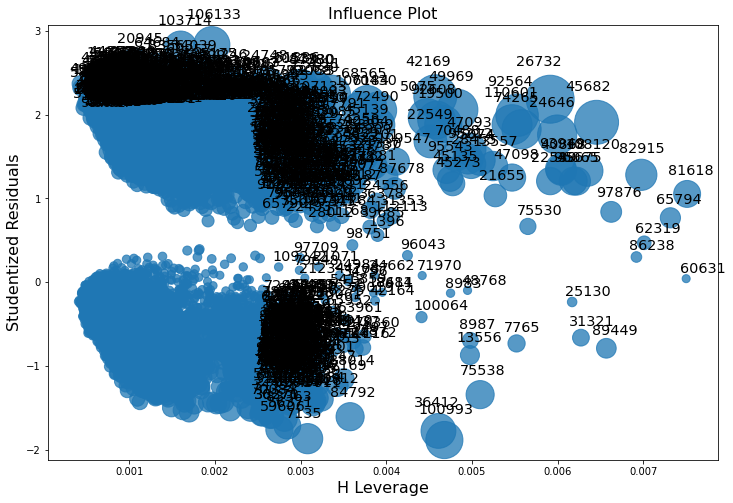

In [ ]:
import statsmodels.api as sg
fig, ax = plt.subplots(figsize=(12,8))
fig = sg.graphics.influence_plot(result, ax=ax, criterion="cooks")

### Clearly, there are many outliers for which we need a robust model that would not get affected by these high leverage points.

### Correlation check to avoid multi-collinearity

In [ ]:
cols=['origin_port','pl','customs_procedures','units','weight','material_handling','weight_class','distance']
len(cols)

8

In [ ]:
df_corr= df_new[cols].corr()
df_corr

,units,weight,material_handling,weight_class,distance
units,1.000000,-0.008116,-0.002339,-0.007098,-0.001315
weight,-0.008116,1.000000,0.016130,0.975734,0.003726
material_handling,-0.002339,0.016130,1.000000,0.010321,0.001832
weight_class,-0.007098,0.975734,0.010321,1.000000,0.004326
distance,-0.001315,0.003726,0.001832,0.004326,1.000000


### Thus, none of the selected features are higly correlated, eliminating the problem of multi collinearity.

In [ ]:
set(cols)-set(df_corr.index)

{'customs_procedures', 'origin_port', 'pl'}

In [ ]:
df_temp=df_new.sample(50000)
tdf = df_temp[cols]
df_fitted_vs_actual = pd.DataFrame()
df_fitted_vs_actual['Actual'] = df_temp['late_order']
df_fitted_vs_actual['Predicted'] = result.predict(exog = tdf)
df_fitted_vs_actual['Residuals'] = df_fitted_vs_actual['Actual']-df_fitted_vs_actual['Predicted']
df_fitted_vs_actual.head()

,Actual,Predicted,Residuals
92717,0,0.414433,-0.414433
37626,0,-0.052431,0.052431
104060,0,0.342121,-0.342121
95472,0,0.271713,-0.271713
25245,0,0.222281,-0.222281


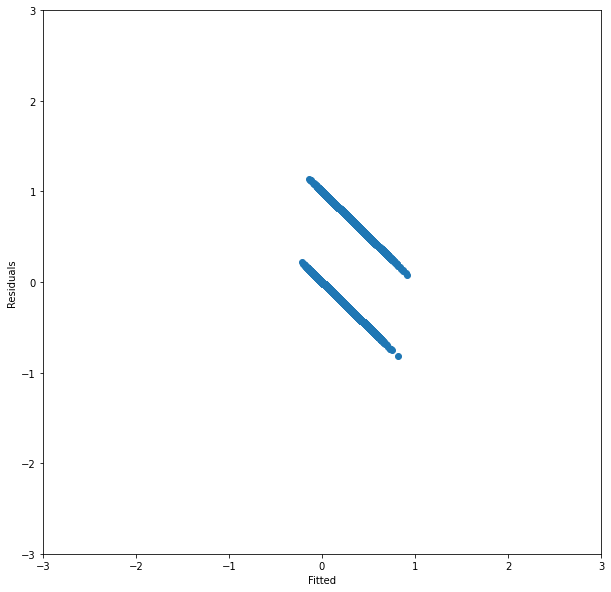

In [ ]:
plt.figure(figsize=(10,10))
plt.xlim(-3,3)
plt.ylim(-3, 3)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.scatter(df_fitted_vs_actual['Predicted'],df_fitted_vs_actual['Residuals'])

### For finding the model with interactions. Though each of the factors are not correlated to each other, there might be some interactions that can give a better reasoning for delay. This can be explored by trying all the possible interactions.

In [ ]:
from itertools import combinations_with_replacement 
cols=['origin_port','pl','customs_procedures','units','weight','material_handling','weight_class','distance']
comb_1=combinations_with_replacement(cols, 1)
comb_2 = combinations_with_replacement(cols, 2)
all_comb = list(comb_1)+list(comb_2)

### We are using adjusted r2 as the metric to include a term in the model or not. If there is an increase in the adjusted r2 value, the term is included, otherwise the term is ignored.

In [ ]:
adjusted_r2=[]
appended_comb = []
ignored_comb = []
formula_string = 'late_order ~ '
for comb in all_comb:
    temp_string = formula_string
    if(len(comb)==1):
        formula_string += ' + '+ comb[0]
        
    elif(len(comb)==2):
        if(comb[0]==comb[1]):
            formula_string += ' + '+comb[0]+'**'+'2'
        else:
            formula_string +=' + '+comb[0] +'*'+ comb[1]

    result = sm.ols(formula=formula_string , data=df_temp).fit()
    if(len(adjusted_r2)<1):
        adjusted_r2.append(result.rsquared_adj)
        appended_comb.append(comb)
    else:
        if(adjusted_r2[-1]>result.rsquared_adj):
            ignored_comb.append(comb)
            formula_string=temp_string
        else:
            appended_comb.append(comb)
            adjusted_r2.append(result.rsquared_adj)

In [ ]:
ignored_comb

[('origin_port', 'material_handling'),
 ('pl', 'units'),
 ('pl', 'weight'),
 ('pl', 'material_handling'),
 ('pl', 'weight_class'),
 ('customs_procedures', 'weight'),
 ('customs_procedures', 'material_handling'),
 ('customs_procedures', 'weight_class'),
 ('units', 'material_handling'),
 ('material_handling', 'distance')]

Text(0, 0.5, 'Adjusted R2')

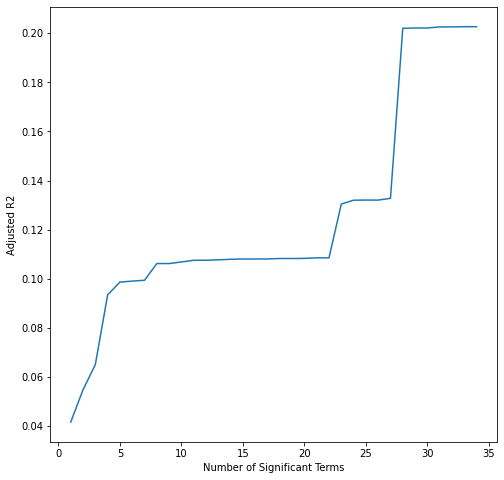

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(range(1,len(adjusted_r2)+1),adjusted_r2)
plt.xlabel("Number of Significant Terms")
plt.ylabel("Adjusted R2")

In [ ]:
# With the final formula string
result = sm.ols(formula=formula_string , data=df_temp).fit()

In [ ]:
significant_factors = result.params[(result.tvalues<-1.96)].index
significant_factors= significant_factors.append(result.params[(result.tvalues>1.96)].index)
len(significant_factors)

35

In [ ]:
insignificant_factors = list(set(result.params.index) - set(significant_factors))
len(insignificant_factors)

17

In [ ]:
significant_factors

Index(['origin_port[T.Barcelona]', 'origin_port[T.Rotterdam]', 'pl[T.v_002]',
       'pl[T.v_003]', 'pl[T.v_004]',
       'origin_port[T.Rotterdam]:customs_procedures[T.DTD]',
       'origin_port[T.Barcelona]:customs_procedures[T.DTP]',
       'origin_port[T.Rotterdam]:customs_procedures[T.DTP]',
       'pl[T.v_002]:customs_procedures[T.DTD]', 'units', 'weight',
       'weight_class', 'origin_port[T.Barcelona]:weight_class',
       'origin_port[T.Rotterdam]:weight_class',
       'origin_port[T.Barcelona]:distance',
       'origin_port[T.Rotterdam]:distance', 'pl[T.v_002]:distance',
       'weight:material_handling', 'weight:distance', 'Intercept',
       'customs_procedures[T.DTD]', 'customs_procedures[T.DTP]',
       'origin_port[T.Rotterdam]:pl[T.v_002]',
       'origin_port[T.Barcelona]:pl[T.v_003]',
       'origin_port[T.Rotterdam]:pl[T.v_003]',
       'origin_port[T.Rotterdam]:pl[T.v_004]',
       'origin_port[T.Barcelona]:weight', 'origin_port[T.Rotterdam]:weight',
       'distan

In [ ]:
insignificant_factors

['pl[T.v_004]:customs_procedures[T.DTP]',
 'origin_port[T.Barcelona]:units',
 'customs_procedures[T.DTP]:units',
 'pl[T.v_003]:distance',
 'pl[T.v_002]:customs_procedures[T.DTP]',
 'origin_port[T.Barcelona]:pl[T.v_004]',
 'customs_procedures[T.DTD]:distance',
 'pl[T.v_003]:customs_procedures[T.DTD]',
 'units:distance',
 'pl[T.v_004]:distance',
 'customs_procedures[T.DTD]:units',
 'origin_port[T.Barcelona]:customs_procedures[T.DTD]',
 'material_handling',
 'pl[T.v_004]:customs_procedures[T.DTD]',
 'pl[T.v_003]:customs_procedures[T.DTP]',
 'origin_port[T.Barcelona]:pl[T.v_002]',
 'origin_port[T.Rotterdam]:units']

In [ ]:
tvalues = result.tvalues
tvalues = abs(tvalues)
tvalues.sort_values(ascending=False)[:53]

weight:weight_class                                   65.879644
Intercept                                             24.047126
units                                                 16.104026
weight_class                                          14.329462
pl[T.v_002]                                            8.881718
units:weight_class                                     8.755725
origin_port[T.Rotterdam]                               7.922142
pl[T.v_004]                                            6.903751
pl[T.v_003]                                            6.264722
weight                                                 6.190482
origin_port[T.Rotterdam]:customs_procedures[T.DTP]     6.113161
material_handling:weight_class                         5.345779
origin_port[T.Barcelona]                               5.022507
origin_port[T.Rotterdam]:pl[T.v_002]                   4.507589
origin_port[T.Rotterdam]:weight                        4.368179
units:weight                            

### Weight and weight class are associated to each other and together act as a significance cause for the late in delivery
### Units and weight class are directly related. They both  play an important role in late delivery.
### Units and weight class are directly related. They both  play an important role in late delivery.
### Units and distance are directly related. They both play an important role in late delivery.
### Weight and distance are directly related. They both play an important role in late delivery.
### Material Handeling and weight class are directly related.
### Weight, material handeling, units distance taken self are highly impacting late delivery.

### Classification - Decision Tree and Logistic Classification¶ In this scenario, we would like to develop a model to check the prediction of delay , just based on order attributes, without considering the time delays. This might aid in developing better recommendations/ rule for planning the deliveries.

Therefore, a supervised learning - classification approach was used to develop a model.

In [ ]:
# Machine Learning
df_classification=df_new.drop(['3pl'],axis=1)

In [ ]:
df_classification.columns

Index(['Unnamed: 0', 'order_id', 'origin_port', 'customs_procedures',
       'logistic_hub', 'customer', 'product_id', 'units', 'late_order',
       'weight', 'material_handling', 'weight_class', 'city_from_name',
       'city_to_name', 'city_from_coord', 'city_to_coord', 'distance',
       'cost_per_unit', 'co2_per_unit', 'pl'],
      dtype='object')

In [ ]:
len(df_classification)

111627

In [ ]:
df_1 = df_new[df.late_order == 0]
df_2 = df_new[df.late_order == 1]
print('Number of deliveries in time',len(df_1))
print('Number of deliveries late',len(df_2))

## Imbalanced Data - subsampling
df_equal = pd.concat([df_1,df_2.sample(len(df_2))])
df_equal=df_equal[df_classification.columns]
df_equal.head()

Number of deliveries in time 85145
Number of deliveries late 26482


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Unnamed: 0,order_id,origin_port,customs_procedures,logistic_hub,customer,product_id,units,late_order,weight,material_handling,weight_class,city_from_name,city_to_name,city_from_coord,city_to_coord,distance,cost_per_unit,co2_per_unit,pl
0,0,c4660f1a2508,Barcelona,DTD,Bratislava,Amsterdam,1650404,492,0,565.0,4.0,0.0,Bratislava,Amsterdam,"(48.1516988, 17.1093063)","(52.3727598, 4.8936041)",987.7402,382.77,666.72,v_004
2,2,797bf1dc596a,Rotterdam,CRF,Bratislava,Amsterdam,1657474,455,0,598.0,5.0,0.0,Bratislava,Amsterdam,"(48.1516988, 17.1093063)","(52.3727598, 4.8936041)",987.7402,382.77,666.72,v_004
3,3,7a0abc024004,Rotterdam,CRF,Bratislava,Amsterdam,1657474,471,0,598.0,5.0,0.0,Bratislava,Amsterdam,"(48.1516988, 17.1093063)","(52.3727598, 4.8936041)",987.7402,382.77,666.72,v_004
5,5,e44e27ecfafa,Rotterdam,DTP,Bratislava,Amsterdam,1664067,543,0,550.0,0.0,0.0,Bratislava,Amsterdam,"(48.1516988, 17.1093063)","(52.3727598, 4.8936041)",987.7402,382.77,666.72,v_003
7,7,cbd2b6f738e6,Rotterdam,CRF,Bratislava,Amsterdam,1672986,477,0,508.0,2.0,0.0,Bratislava,Amsterdam,"(48.1516988, 17.1093063)","(52.3727598, 4.8936041)",987.7402,382.77,666.72,v_004


In [ ]:
df_classification.dtypes

Unnamed: 0              int64
order_id               object
origin_port            object
customs_procedures     object
logistic_hub           object
customer               object
product_id              int64
units                   int64
late_order              int64
weight                float64
material_handling     float64
weight_class          float64
city_from_name         object
city_to_name           object
city_from_coord        object
city_to_coord          object
distance              float64
cost_per_unit         float64
co2_per_unit          float64
pl                     object
dtype: object

In [ ]:
len(df_equal)

111627

### Model Selection and Model Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df_equal.columns

Index(['Unnamed: 0', 'order_id', 'origin_port', 'customs_procedures',
       'logistic_hub', 'customer', 'product_id', 'units', 'late_order',
       'weight', 'material_handling', 'weight_class', 'city_from_name',
       'city_to_name', 'city_from_coord', 'city_to_coord', 'distance',
       'cost_per_unit', 'co2_per_unit', 'pl'],
      dtype='object')

In [ ]:
y = df_equal.late_order
y.unique()

array([0, 1])

In [ ]:
del df_equal['late_order']
df_equal.columns

Index(['Unnamed: 0', 'order_id', 'origin_port', 'customs_procedures',
       'logistic_hub', 'customer', 'product_id', 'units', 'weight',
       'material_handling', 'weight_class', 'city_from_name', 'city_to_name',
       'city_from_coord', 'city_to_coord', 'distance', 'cost_per_unit',
       'co2_per_unit', 'pl'],
      dtype='object')

In [ ]:
y_1=[]
for i in range(0,len(y)):
    if y.iloc[i] == 1:
        y_1.append(1)
    else:
        y_1.append(0)

In [ ]:
y = pd.Series(y_1)
y

0         0
1         0
2         0
3         0
4         0
         ..
111622    1
111623    1
111624    1
111625    1
111626    1
Length: 111627, dtype: int64

In [ ]:
cols2=['units','weight','material_handling','weight_class','distance']

In [ ]:
df_equal[cols2]

,units,weight,material_handling,weight_class,distance
0,492,565.0,4.0,0.0,987.7402
2,455,598.0,5.0,0.0,987.7402
3,471,598.0,5.0,0.0,987.7402
5,543,550.0,0.0,0.0,987.7402
7,477,508.0,2.0,0.0,987.7402
...,...,...,...,...,...
63131,440,1294.0,2.0,5.0,1108.5886
67889,461,1086.0,0.0,3.0,1153.4178
3289,402,976.0,4.0,2.0,844.0198
87170,588,1885.0,5.0,8.0,1159.0472


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_equal[cols2], y, test_size = 0.2)

dec_clf = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dec_clf.predict(X_test)
print(accuracy_score(y_pred,y_test))



0.7087252530681717


In [ ]:
from sklearn.model_selection import cross_val_score
depth = []
for i in range(3,20):
    clf = DecisionTreeClassifier(max_depth=i).fit(X_train,y_train)
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=4)
    depth.append(scores.mean())

In [ ]:
len(depth)

17

Text(0, 0.5, 'Accuracy')

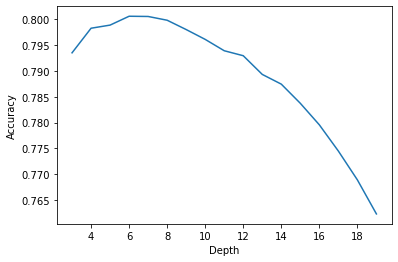

In [ ]:
plt.plot(range(3,20),depth)
plt.xlabel('Depth')
plt.ylabel('Accuracy')

In [ ]:
best_depth = range(3,20)[np.argmax(depth)]
best_depth

6

In [ ]:

X_test

,units,weight,material_handling,weight_class,distance
81114,432,1551.0,4.0,6.0,696.3485
6080,529,744.0,3.0,1.0,477.3717
19168,554,1379.0,3.0,5.0,1473.6254
27703,595,1288.0,5.0,4.0,1787.4018
92605,541,2054.0,4.0,9.0,523.8994
...,...,...,...,...,...
38824,453,1570.0,3.0,6.0,2008.8628
24965,600,1294.0,2.0,5.0,132.0362
3654,486,1208.0,5.0,4.0,2170.9236
13190,461,1110.0,5.0,3.0,487.5926


In [ ]:
dec = DecisionTreeClassifier(max_depth=best_depth).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.7685210068977874


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.7875571083042193


In [ ]:
depth_scores = []
for i in range(3,150):
    rf_clf = RandomForestClassifier(max_depth=i).fit(X_train,y_train)
    scores = cross_val_score(estimator=rf_clf, X=X_train, y=y_train, cv=5, n_jobs=4)
    depth_scores.append(scores.mean())

Text(0, 0.5, 'Accuracy')

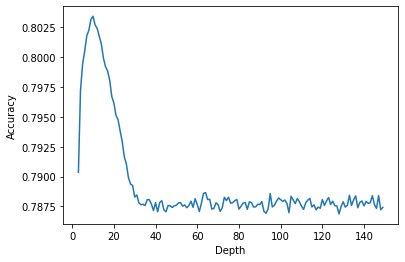

In [ ]:
plt.plot(range(3,150),depth_scores)
plt.xlabel('Depth')
plt.ylabel('Accuracy')

In [ ]:
best_depth_rf = range(3,150)[np.argmax(depth_scores)]
depth_scores[best_depth_rf]

0.8017379442457002

In [ ]:
rf_clf = RandomForestClassifier(max_depth=best_depth_rf).fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.8017558004120756


In [ ]:
X_test = df_test[cols2]
X_test = X_test.fillna(-1)

In [ ]:
X_test

,units,weight,material_handling,weight_class,distance
0,526,598.0,5.0,0.0,987.7402
1,475,598.0,5.0,0.0,987.7402
2,488,463.0,2.0,0.0,987.7402
3,433,594.0,5.0,0.0,987.7402
4,447,504.0,3.0,0.0,987.7402
...,...,...,...,...,...
28558,471,1884.0,3.0,8.0,-1.0000
28559,368,2876.0,3.0,9.0,-1.0000
28560,535,2411.0,0.0,9.0,-1.0000
28561,508,2164.0,5.0,9.0,-1.0000


In [ ]:
id=[]
for i in range (0,28563):
  id.append(df_test['order_id'][i])




In [ ]:
len(id)

28563

In [ ]:
len(df_test['order_id'])

28563

In [ ]:
pred_proba = rf_clf.predict_proba(X_test)
print(pred_proba)

[[0.80359672 0.19640328]
 [0.77245258 0.22754742]
 [0.68643469 0.31356531]
 ...
 [0.3938086  0.6061914 ]
 [0.67562888 0.32437112]
 [0.46215038 0.53784962]]


In [ ]:


X_test['order_id'] = id


In [ ]:
X_test

,units,weight,material_handling,weight_class,distance,order_id
0,526,598.0,5.0,0.0,987.7402,21f46131b97a
1,475,598.0,5.0,0.0,987.7402,7c2bc95d92cf
2,488,463.0,2.0,0.0,987.7402,af989251c6df
3,433,594.0,5.0,0.0,987.7402,cbb02981443c
4,447,504.0,3.0,0.0,987.7402,d831e0817ae2
...,...,...,...,...,...,...
28558,471,1884.0,3.0,8.0,-1.0000,1f7e5e9378b7
28559,368,2876.0,3.0,9.0,-1.0000,028fedb6a722
28560,535,2411.0,0.0,9.0,-1.0000,2f24b33130fe
28561,508,2164.0,5.0,9.0,-1.0000,4b598db162aa


In [ ]:
submission = pd.DataFrame({"order_id": X_test.order_id, "late_order": pred_proba[:,1]})
submission.to_csv("submission_kaggle3.csv", index=False)